In [2]:
from neuron import h
from neuron.units import ms,mV
from cell import Cell
h.load_file('stdrun.hoc')
import matplotlib.pyplot as plt

class Interneuron(Cell):
    name = 'Interneuron'
    def _set_morphology(self):
        self.soma = h.Section(name='soma', cell=self)
        self.soma.L=self.soma.diam = 10

In [3]:
from cell import Cell
class Interneuron(Cell):
    name = 'Interneuron'
    def _set_morphology(self):
        self.soma = h.Section(name='soma', cell=self)
        self.soma.L=self.soma.diam = 10
    def _set_biophysics(self):

        for sec in self.all:
            sec.Ra = 100
            sec.cm = 1.5
            
        

In [4]:
cell1 = Interneuron (0,0,0,0,0)

In [5]:
cell1.soma.insert('interneuron_mech')

stim = h.IClamp(cell1.soma(0.5)) #change as per the requirement
stim.amp = 1
stim.dur = 500
stim.delay = 0


In [5]:
v1 = h.Vector().record(cell1.soma(0.9)._ref_v)
t = h.Vector().record(h._ref_t)

In [6]:
h.finitialize(-55)
h.continuerun(500)

0.0

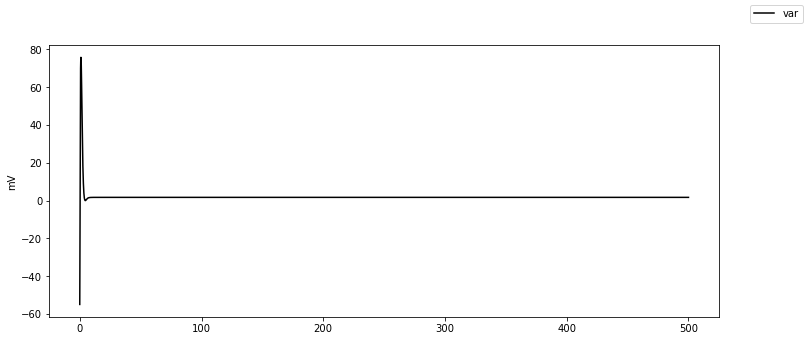

In [7]:
fig1 = plt.figure(figsize=(12,5))
ax1 = fig1.add_subplot(1,1,1)
p1 = ax1.plot(t,v1,color='black',label='var')
ax1.set_xlabel = 'ms'
ax1.set_ylabel('mV')
fig1.legend()